# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [1]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8 -y
!pip install mecab-python3
import MeCab

# mecabrc の場所を明示（Colabは /etc/mecabrc にある）
mecab = MeCab.Tagger("-r /etc/mecabrc -Ochasen")
print(mecab.parse("私は昨日、図書館へ行って本を読みました。"))

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 35 not upgraded.
Need to get 7,367 kB of archives.
After this operation, 59.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab2 amd64 0.996-14build9 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab-dev amd64 0.996-14build9 [306 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-utils amd64 0.996-14build9 [4,850 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-ipadic all 2.7.0-20070801+main-3 [6,718 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab amd64 0.996-14build9 [136 kB]
Get:6 http://archive.ubuntu.co

## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [3]:
import MeCab

mecab = MeCab.Tagger("-r /etc/mecabrc")

node = mecab.parseToNode(text)
while node:
    # 品詞情報は feature に入っている
    features = node.feature.split(",")
    if features[0] == "動詞":  # 品詞が動詞
        print(node.surface)    # 単語の表層形を出力
    node = node.next

し
除か
なら
し
わから
吹き
遊ん
暮し
来


## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [4]:
node = mecab.parseToNode(text)
while node:
    # 品詞情報は feature に入っている
    features = node.feature.split(",")
    if features[0] == "動詞":  # 品詞が動詞
        print(f'動詞:{node.surface},原型:{features[6]}')    # 単語の表層形を出力
    node = node.next

動詞:し,原型:する
動詞:除か,原型:除く
動詞:なら,原型:なる
動詞:し,原型:する
動詞:わから,原型:わかる
動詞:吹き,原型:吹く
動詞:遊ん,原型:遊ぶ
動詞:暮し,原型:暮す
動詞:来,原型:来る


## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [5]:
node = mecab.parseToNode(text)
results=[]

while node:
  features = node.feature.split(",")
  # 品詞情報が名詞か
  if features[0] == "名詞":  # 品詞が動詞
    first = node.surface
    next1=node.next
    if next1:
      features2 = next1.feature.split(",")
      #次がの
      if features2[0] == "助詞" and features2[6] == "の":
        next2=next1.next
        if next2:
          features3 = next2.feature.split(",")
          #次が名詞
          if features3[0] == "名詞":
            second = next2.surface
            results.append(f'{first}の{second}')

  node = node.next
for phrase in results:
    print(phrase)

暴虐の王
村の牧人


## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [6]:
!pip install -U ginza
!python -m spacy download ja_ginza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00

✘ No compatible package found for 'ja_ginza' (spaCy v3.8.7)



In [7]:
!pip install ginza ja-ginza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 10.9 MB/s eta 0:00:00


In [8]:
import spacy

nlp = spacy.load("ja_ginza")

doc = nlp(text)

for token in doc:
    if token.dep_ != "ROOT":  # 係り先があるものだけ
        print(f"{token.head.text}\t{token.text}")

メロス	

激怒	メロス
メロス	は
激怒	し
激怒	た
激怒	。
除か	必ず
必ず	、
暴虐	かの
暴虐	邪智
王	暴虐
暴虐	の
除か	王
王	を
決意	除か
除か	なけれ
なけれ	ば
なけれ	なら
なけれ	ぬ
除か	と
決意	し
決意	た
決意	。
メロス	

わから	メロス
メロス	に
メロス	は
わから	政治
政治	が
わから	ぬ
わから	。
メロス	

牧人	メロス
メロス	は
メロス	、
牧人	村
村	の
牧人	で
で	ある
牧人	。
笛	

吹き	笛
笛	を
暮し	吹き
吹き	、
遊ん	羊
羊	と
暮し	遊ん
遊ん	で
暮し	て
て	来
暮し	た
暮し	。
邪悪	


	けれど

	も
敏感	邪悪
邪悪	に
に	対し
に	ては
邪悪	、
倍	人
倍	一
敏感	倍
倍	に
敏感	で
で	あっ
敏感	た
敏感	。


## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [9]:

for token in doc:
    # tokenが動詞などの述語かつ、主語が「メロス」のものを探す
    if token.pos_ in ("VERB", "AUX"):  # 動詞・助動詞
        # その述語の主語を探す
        for child in token.children:
            if child.dep_ == "nsubj" and child.text == "メロス":
                print(token.text)

激怒


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

ERROR: unknown command "spacy_streamlit"


In [13]:
import spacy

# GiNZAのモデルをロード
nlp = spacy.load("ja_ginza")

text = "メロスは激怒した。"
doc = nlp(text)

# 係り受け情報を表示
for token in doc:
    print(f"{token.text:<5} -> {token.head.text:<5} ({token.dep_})")

# 可視化（Jupyterならspacy.displacy.renderを使える）
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True, options={"compact": True, "distance": 90})
# 係り受け木を可視化
displacy.serve(doc, style="dep", port=8000)

メロス   -> 激怒    (nsubj)
は     -> メロス   (case)
激怒    -> 激怒    (ROOT)
し     -> 激怒    (aux)
た     -> 激怒    (aux)
。     -> 激怒    (punct)


/usr/local/lib/python3.12/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:8000 ...

Shutting down server on port 8000.


## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [14]:
!wget https://github.com/nlp100/2025/raw/refs/heads/main/data/jawiki-country.json.gz

--2025-08-24 16:04:21--  https://github.com/nlp100/2025/raw/refs/heads/main/data/jawiki-country.json.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nlp100/2025/refs/heads/main/data/jawiki-country.json.gz [following]
--2025-08-24 16:04:22--  https://raw.githubusercontent.com/nlp100/2025/refs/heads/main/data/jawiki-country.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5068362 (4.8M) [application/octet-stream]
Saving to: ‘jawiki-country.json.gz’

jawiki-country.json 100%[===================>]   4.83M  --.-KB/s    in 0.08s   

2025-08-24 16:04:22 (57.0 MB/s) - ‘jawiki-country.json.gz’ 

In [15]:
!ls

jawiki-country.json.gz	sample_data


In [17]:
import gzip
import json
import re
from collections import Counter
import MeCab

# 形態素解析器の準備
mecab = MeCab.Tagger("-r /etc/mecabrc -Owakati")

def clean_text(text):
    """Wikipediaのマークアップをざっくり除去"""
    text = re.sub(r"\{\{.*?\}\}", "", text)  # {{ }} テンプレート除去
    text = re.sub(r"\[\[.*?\|(.*?)\]\]", r"\1", text)  # [[記事名|表示名]] → 表示名
    text = re.sub(r"\[\[(.*?)\]\]", r"\1", text)  # [[記事名]] → 記事名
    text = re.sub(r"<.*?>", "", text)  # <ref> など除去
    text = re.sub(r"'{2,}", "", text)  # '' 強調記号除去
    return text

word_counter = Counter()

# gzipファイルを読み込む
with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        article = json.loads(line)  # 1行 = 1記事のJSON
        text = article.get("text", "")
        text = clean_text(text)  # マークアップ除去
        words = mecab.parse(text).strip().split()  # 分かち書き
        word_counter.update(words)

# 頻度上位20語を表示
for word, freq in word_counter.most_common(20):
    print(word, freq)

の 75069
、 69322
。 44969
は 43248
に 40054
が 36601
| 33160
を 31355
た 28257
で 28204
. 23044
と 22917
年 22033
て 21833
し 20477
= 20394
） 15520
/ 15385
（ 15246
- 12185


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [21]:
!unzip jawiki-country.json.gz

Archive:  jawiki-country.json.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of jawiki-country.json.gz or
        jawiki-country.json.gz.zip, and cannot find jawiki-country.json.gz.ZIP, period.


In [22]:
!ls

jawiki-country.json.gz	sample_data


In [26]:
import json
from collections import Counter
import MeCab

# JSON形式のコーパスファイル（1行1記事）のパス
corpus_file = "jawiki-country.json.gz"

# MeCabの準備
mecab = MeCab.Tagger("-r /etc/mecabrc -Ochasen")

# 名詞のカウンター
noun_counter = Counter()

# コーパスを1行ずつ読み込む
with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        article = json.loads(line)
        text = article.get("text", "")
        text = clean_text(text)  # マークアップ除去
        # 形態素解析
        node = mecab.parseToNode(text)
        while node:
            features = node.feature.split(",")
            if features[0] == "名詞":
                noun = node.surface
                if noun:  # 空文字列は除く
                    noun_counter[noun] += 1
            node = node.next

# 出現頻度上位20語を表示
for word, freq in noun_counter.most_common(20):
    print(f"{word}: {freq}")

|: 33159
.: 23042
年: 22033
=: 20381
/: 15369
-: 12181
*: 9925
月: 9815
===: 9709
日: 7807
人: 7754
1: 7673
==: 6927
国: 6677
2: 6466
,: 5432
||: 5181
%: 5000
語: 4765
://: 4745


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [28]:
import json
import gzip
import re
import MeCab
import math
from collections import Counter, defaultdict


def remove_markup(text):
    # 強調マークアップの除去
    text = re.sub(r"\'{2,5}", "", text)
    # 内部リンクの除去
    text = re.sub(r"\[\[(?:[^|\]]*?\|)??([^|\]]+?)\]\]", r"\1", text)
    # 外部リンクの除去
    text = re.sub(r"\[http://[^\]]+\]", "", text)
    # HTMLタグの除去
    text = re.sub(r"<[^>]+>", "", text)
    # テンプレートの除去
    text = re.sub(r"\{\{.*?\}\}", "", text)
    return text


def calculate_tfidf():
    # MeCabの初期化
    mecab = MeCab.Tagger("-r /etc/mecabrc -Ochasen")

    # 文書数をカウントするための変数
    total_docs = 0
    # 各名詞が出現する文書数をカウント
    doc_freq = defaultdict(int)
    # 日本に関する記事の名詞の出現頻度をカウント
    japan_noun_freq = Counter()

    # gzipファイルを読み込む
    with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
        for line in f:
            total_docs += 1
            article = json.loads(line)
            text = article["text"]

            # マークアップを除去
            text = remove_markup(text)

            # 形態素解析を行い、名詞をカウント
            node = mecab.parseToNode(text)
            # この文書で出現した名詞を記録
            doc_nouns = set()
            while node:
                if node.feature.split(",")[0] == "名詞":
                    noun = node.surface
                    doc_nouns.add(noun)
                    # 日本に関する記事の場合、出現頻度をカウント
                    if article["title"] == "日本":
                        japan_noun_freq[noun] += 1
                node = node.next
            # 文書頻度を更新
            for noun in doc_nouns:
                doc_freq[noun] += 1

    # TF-IDFスコアを計算
    tfidf_scores = {}
    for noun, tf in japan_noun_freq.items():
        # IDFの計算
        idf = math.log(total_docs / doc_freq[noun])
        # TF-IDFスコアの計算
        tfidf_scores[noun] = {"tf": tf, "idf": idf, "tfidf": tf * idf}

    # TF-IDFスコアの高い順に20語を表示
    for noun, scores in sorted(
        tfidf_scores.items(), key=lambda x: x[1]["tfidf"], reverse=True
    )[:20]:
        print(f"{noun}:")
        print(f"  TF: {scores['tf']}")
        print(f"  IDF: {scores['idf']:.4f}")
        print(f"  TF-IDF: {scores['tfidf']:.4f}")


if __name__ == "__main__":
    calculate_tfidf()

琉球:
  TF: 45
  IDF: 4.4148
  TF-IDF: 198.6667
天皇:
  TF: 67
  IDF: 2.7408
  TF-IDF: 183.6363
倭国:
  TF: 35
  IDF: 4.8203
  TF-IDF: 168.7099
*「:
  TF: 35
  IDF: 4.8203
  TF-IDF: 168.7099
沖縄:
  TF: 50
  IDF: 2.8744
  TF-IDF: 143.7186
朝鮮:
  TF: 51
  IDF: 2.6231
  TF-IDF: 133.7759
倭:
  TF: 32
  IDF: 4.1271
  TF-IDF: 132.0683
列島:
  TF: 42
  IDF: 3.1155
  TF-IDF: 130.8524
:::
  TF: 37
  IDF: 3.4340
  TF-IDF: 127.0575
日本書紀:
  TF: 22
  IDF: 5.5134
  TF-IDF: 121.2954
**「:
  TF: 20
  IDF: 5.5134
  TF-IDF: 110.2686
北陸:
  TF: 19
  IDF: 5.5134
  TF-IDF: 104.7551
県:
  TF: 171
  IDF: 0.6082
  TF-IDF: 103.9943
明治:
  TF: 38
  IDF: 2.5690
  TF-IDF: 97.6216
北海道:
  TF: 37
  IDF: 2.6231
  TF-IDF: 97.0531
台湾:
  TF: 62
  IDF: 1.5431
  TF-IDF: 95.6745
日本:
  TF: 788
  IDF: 0.1198
  TF-IDF: 94.4033
奄美:
  TF: 21
  IDF: 4.4148
  TF-IDF: 92.7111
韓国:
  TF: 57
  IDF: 1.6014
  TF-IDF: 91.2801
唐:
  TF: 28
  IDF: 3.2108
  TF-IDF: 89.9036


## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

In [30]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8474ccba1397498c9bad17c8e843d383eab9a4b1e46a035af9cd42779114ea94
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib


FileNotFoundError: [Errno 2] No such file or directory: 'ch04/word_frequency_rank.png'

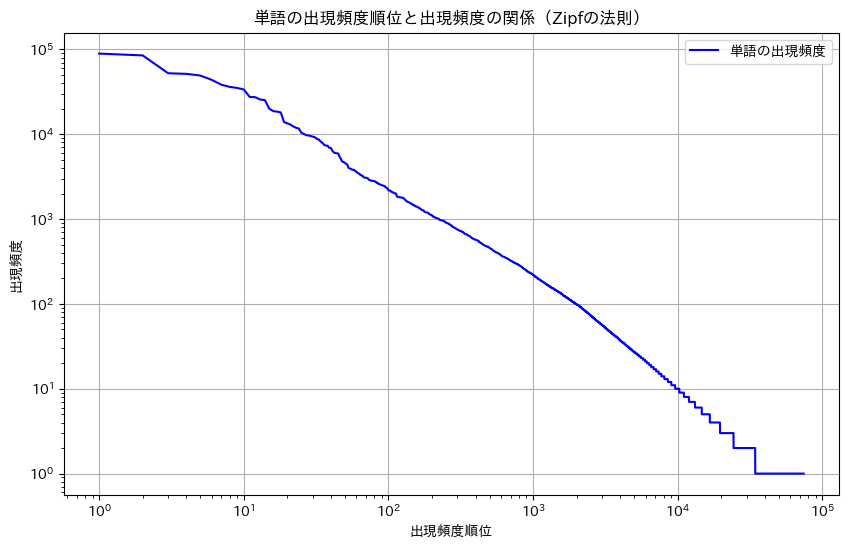

In [33]:
import json
import gzip
import re
import MeCab
import matplotlib.pyplot as plt
from collections import Counter
import japanize_matplotlib


def remove_markup(text):
    # 強調マークアップの除去
    text = re.sub(r"\'{2,5}", "", text)
    # 内部リンクの除去
    text = re.sub(r"\[\[(?:[^|\]]*?\|)??([^|\]]+?)\]\]", r"\1", text)
    # 外部リンクの除去
    text = re.sub(r"\[http://[^\]]+\]", "", text)
    # HTMLタグの除去
    text = re.sub(r"<[^>]+>", "", text)
    # テンプレートの除去
    text = re.sub(r"\{\{.*?\}\}", "", text)
    return text


def plot_word_frequency_rank():
    # MeCabの初期化
    mecab = MeCab.Tagger("-r /etc/mecabrc -Owakati")

    # 単語の出現頻度をカウントするためのCounter
    word_counter = Counter()

    # gzipファイルを読み込む
    with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
        for line in f:
            article = json.loads(line)
            text = article["text"]

            # マークアップを除去
            text = remove_markup(text)

            # 形態素解析を行い、単語をカウント
            words = mecab.parse(text).strip().split()
            word_counter.update(words)

    # 出現頻度の順位と頻度を取得
    frequencies = list(word_counter.values())
    frequencies.sort(reverse=True)
    ranks = range(1, len(frequencies) + 1)

    # グラフの描画
    japanize_matplotlib.japanize()
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, "b-", label="単語の出現頻度")
    plt.grid(True)
    plt.xlabel("出現頻度順位")
    plt.ylabel("出現頻度")
    plt.title("単語の出現頻度順位と出現頻度の関係（Zipfの法則）")
    plt.legend()

    # グラフを保存
    plt.savefig("ch04/word_frequency_rank.png")
    plt.close()


if __name__ == "__main__":
    plot_word_frequency_rank()